___

### UniCluster - Public-Private Institution Classification via K-means
___
This project, UniCluster, uses K-means clustering to categorize universities into public and private institutions. It employs unsupervised machine learning techniques to analyze institutional data and automatically group similar universities. The goal is to create an efficient, data-driven method for classifying educational institutions based on their characteristics, that could potentially aid in policy-making, funding allocation, educational research, and prospective students' choices.

<img src='kmeans.png' /></a>
___

## Import Libraries

**Importing some libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Load and read the data with pandas and using first column as index**

In [2]:
df = pd.read_csv('college.txt')
df = pd.read_csv('college.txt', index_col = df.columns[0])

**Display first few line of the data**

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Checking info() and describe() methods to explore the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Exploratory Data Analysis

**Plot scatterplot for Grad.Rate versus Room.Board; points colored by the Private column**

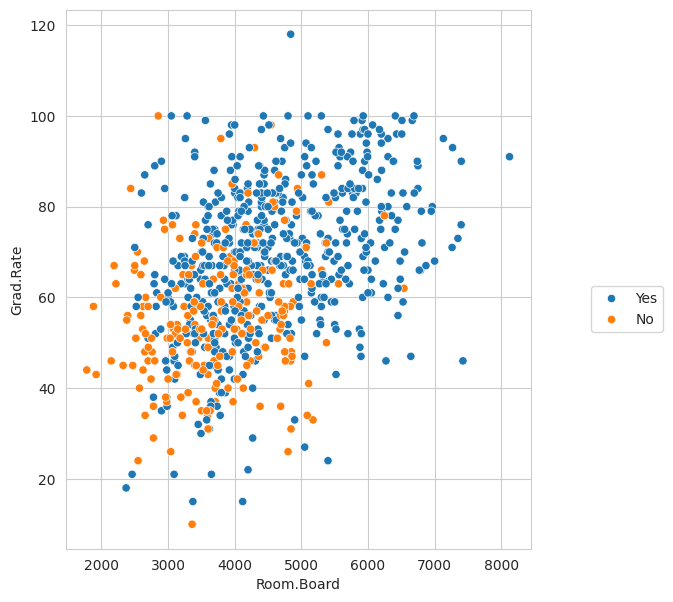

In [6]:
plt.figure(figsize=(6,7))
sns.scatterplot(data=df, x='Room.Board', y='Grad.Rate', hue='Private')
plt.legend(loc='best', bbox_to_anchor=(0.8, 0., 0.5, 0.5));

**Create scatterplot for F.Undergrad versus Outstate, points are colored by the Private column**

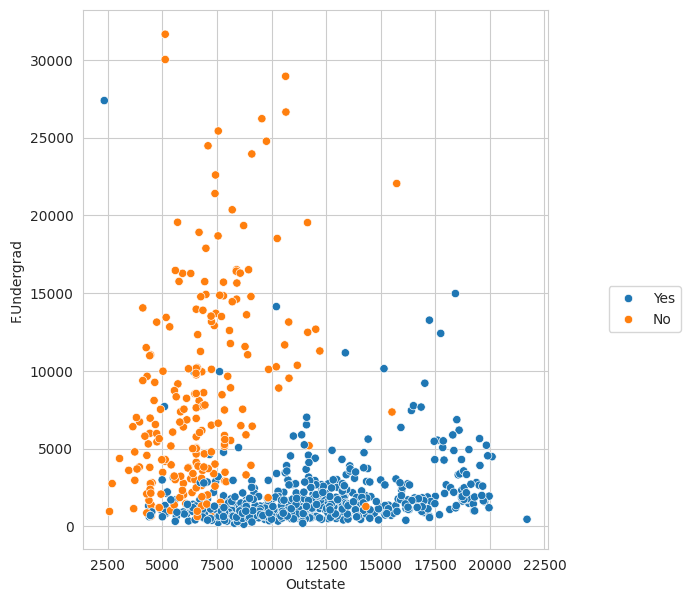

In [7]:
plt.figure(figsize=(6,7))
sns.scatterplot(data=df, x='Outstate', y='F.Undergrad', hue='Private')
plt.legend(loc='best', bbox_to_anchor=(0.8, 0., 0.5, 0.5));

**Create stacked histogram for Out of State Tuition based on the Private column**

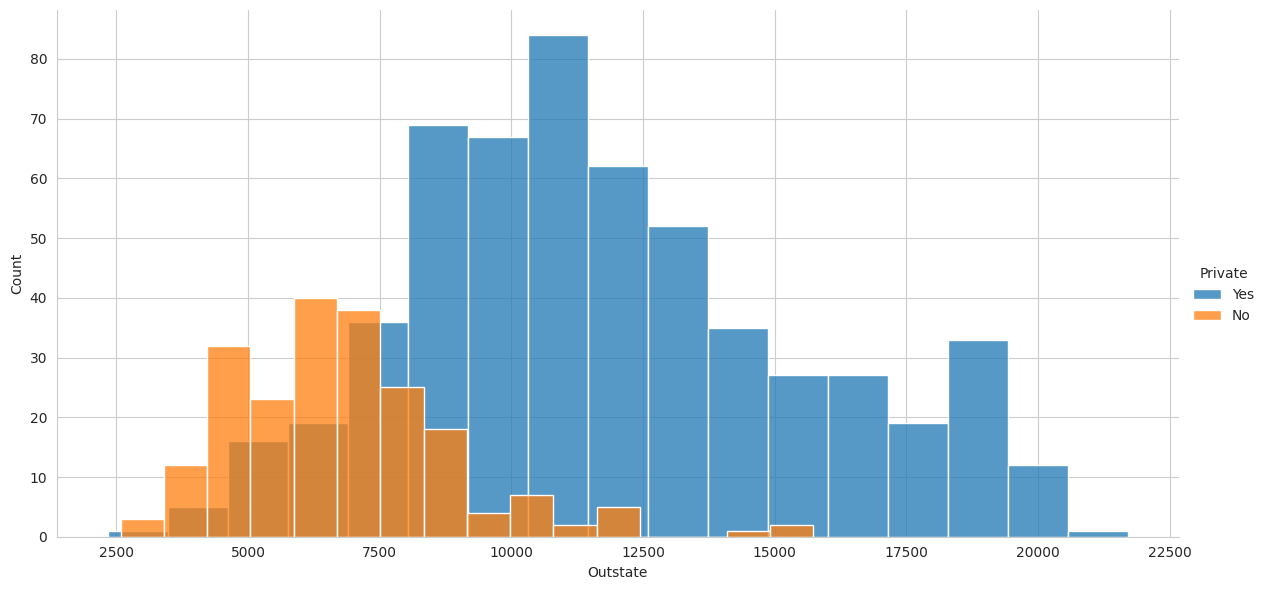

In [8]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2)
g.map(sns.histplot, "Outstate", kde=False)
g.add_legend()

# Show the plot
plt.show();

**Create a similar histogram for Grad.Rate column:**

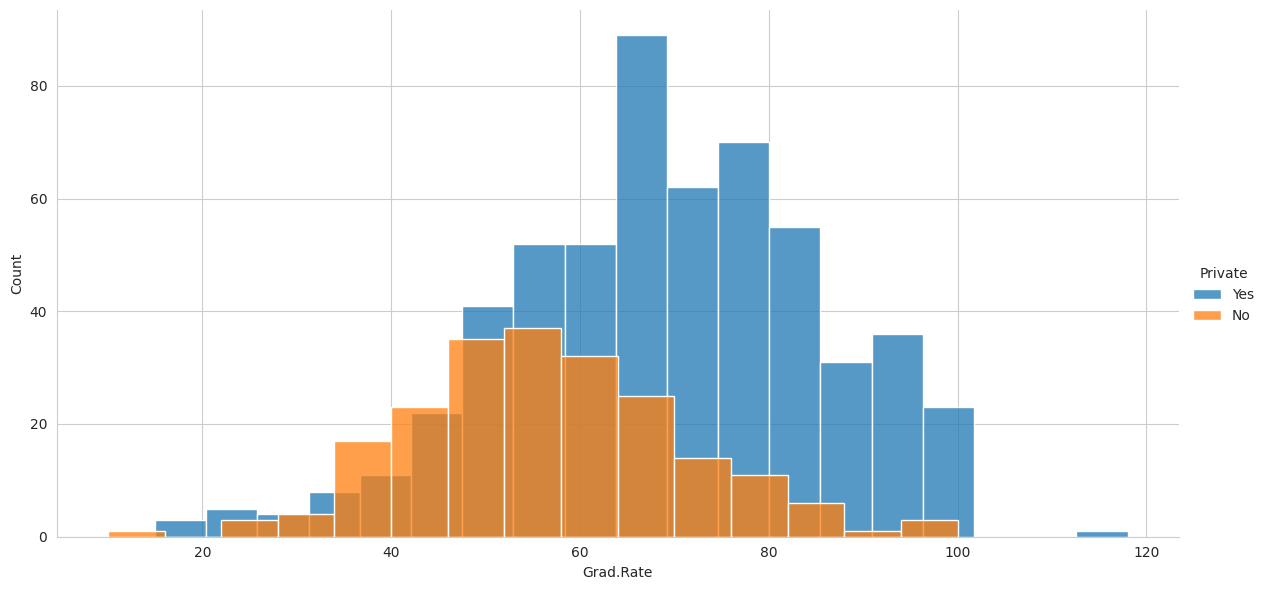

In [9]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2)
g.map(sns.histplot, "Grad.Rate", kde=False)
g.add_legend()

# Show the plot
plt.show()

**Identify private school(s) with a graduation rate of higher than 100%**

In [10]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set Cazenovia College's graduation rate to 100**

In [11]:
# Set the graduation rate for 'Cazenovia College' to 100
df.loc['Cazenovia College', 'Grad.Rate'] = 100

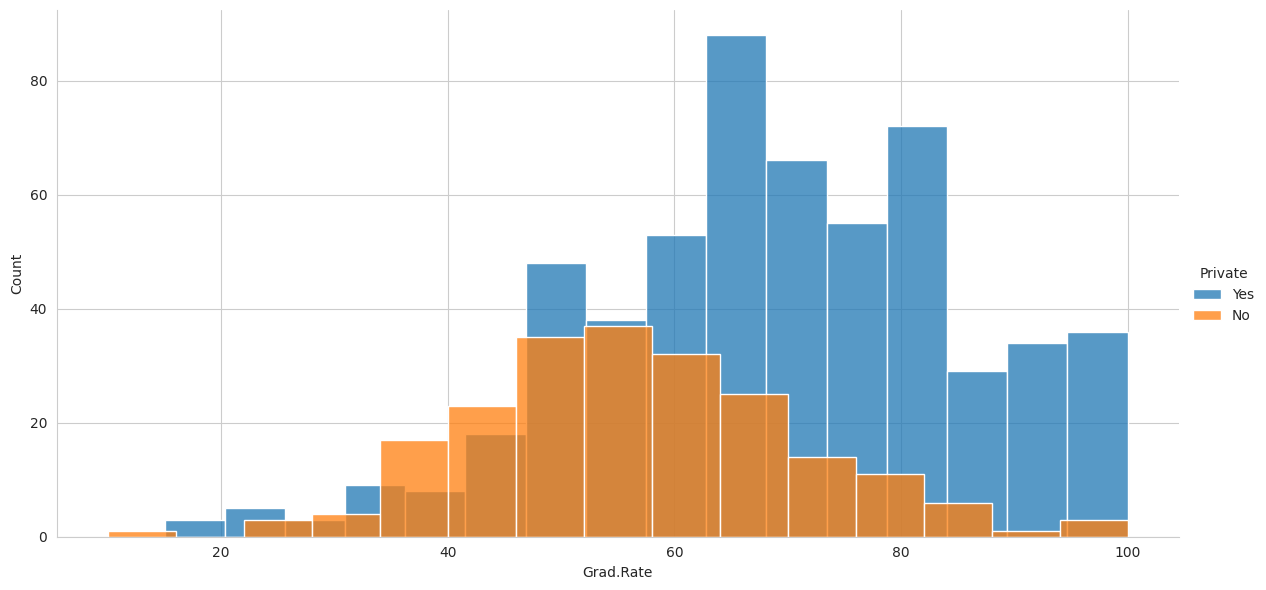

In [12]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2)
g.map(sns.histplot, "Grad.Rate", kde=False)
g.add_legend()

# Show the plot
plt.show()

### K-Means Clustering

In [13]:
# Import KMeans from SciKit Learn
from sklearn.cluster import KMeans

**Create an instance of a KMeans model with 2 clusters**

In [14]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=1e-4)

**Fit the model to all the data except for the Private label**

In [15]:
km.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

**Get the cluster center vectors**

In [16]:
km.cluster_centers_

array([[1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01],
       [1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01]])

### Evaluation

* Use the label to evaluate our clusters

**Create a new column, Cluster, with label 1 for a Private, and 0 for public**

In [17]:
# Creating the 'Cluster' column using apply and lambda
df['Cluster'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Create a confusion matrix and classification report to see the Kmeans clustering performance without labels:**

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           89          123
Actual 1           12          553


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57       212
           1       0.82      0.98      0.89       565

    accuracy                           0.83       777
   macro avg       0.85      0.70      0.73       777
weighted avg       0.84      0.83      0.80       777



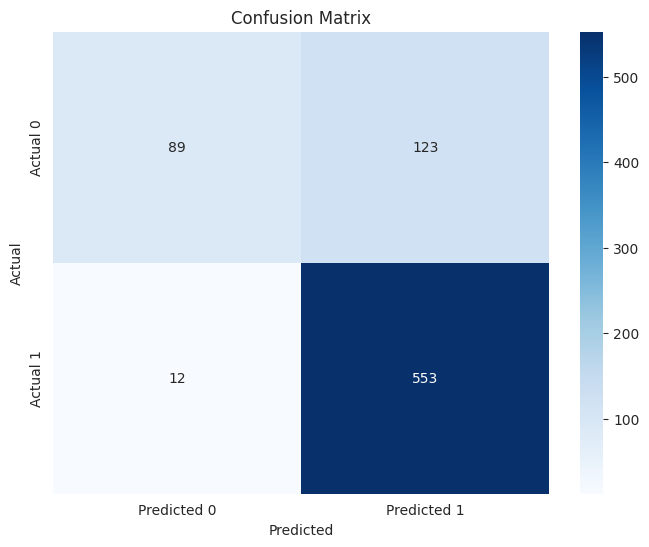

In [18]:
from sklearn.metrics import confusion_matrix, classification_report


# Calculate confusion matrix
conf_matrix = confusion_matrix(df['Cluster'], km.labels_)

# Create a DataFrame for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual 0', 'Actual 1'], 
                              columns=['Predicted 0', 'Predicted 1'])

print("Confusion Matrix:")
print(conf_matrix_df)
print("\n")

print("Classification Report:")
print(classification_report(df['Cluster'], km.labels_))

# Visualize the confusion matrix using seaborn heatmap for better clarity
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

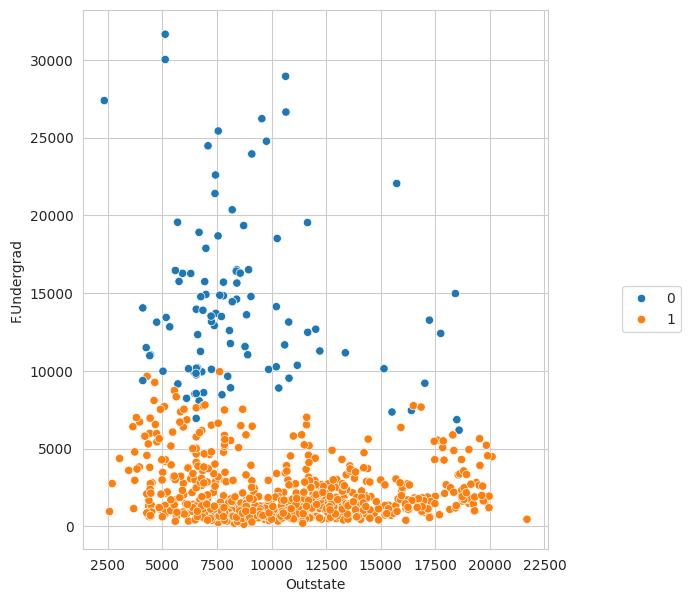

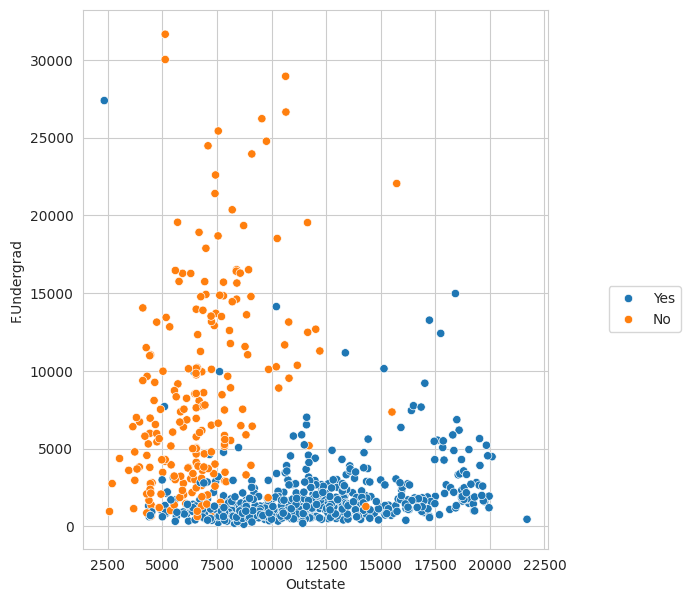

In [19]:
plt.figure(figsize=(6,7))
sns.scatterplot(data=df, x='Outstate', y='F.Undergrad', hue=km.labels_)
plt.legend(loc='best', bbox_to_anchor=(0.8, 0., 0.5, 0.5))
plt.figure(figsize=(6,7))
sns.scatterplot(data=df, x='Outstate', y='F.Undergrad', hue='Private')
plt.legend(loc='best', bbox_to_anchor=(0.8, 0., 0.5, 0.5));

### The outcome is not great, but also not too bad. It's quite decent considering the algorithm is solely using the features to cluster the universities into 2 distinct groups!


